<img width="150" src="https://perso.univ-lemans.fr/~cdesjouy/_images/lmu.png" align="left">
<img width="100" src="https://perso.univ-lemans.fr/~cdesjouy/_images/gplv3.png" align="right">
<br><br><br>

---

# Formation doctorale : Partie III

Cyril Desjouy

---

## Dérivation numérique

La dérivée numérique de la fonction $f_i$ au point $i$ d'un maillage de $N$ points peut s'écrire à l'ordre 2 :

$$f'_i = \dfrac{f_{i+1} - f_{i-1}}{2 h} \text{  pour  } 1<i<N-1,$$

où $h$ est la distance entre chaque point du maillage. La dérivée décentrée au premier point du maillage ($i = 0$) peut s'écrire à l'ordre 1 : 

$$f'_0 = \dfrac{f_{1} - f_{0}}{h},$$

tandis que celle au dernier point (i=N) peut s'écrire : 

$$f'_N = \dfrac{f_{N} - f_{N-1}}{h}.$$


L'objectif est ici de comparer les performances de différentes formulations algorithmiques de la dérivation numérique exposée ci-dessus. La première formulation utilise une boucle `for` et la seconde formulation remplace la boucle `for` par des slices. 


## Les fonctions de dérivation

Il s'agit de compléter le code ci-après comme suit : 

* Copier le contenu de la fonction `fderivation()` dans une nouvelle fonction `sderivation()` dans laquelle la boucle `for` est remplacée par des slices appropriés.

* Copier le contenu de la fonction `fderivation()` dans une nouvelle fonction `jderivation()` que vous decorerez avec le décorateur @numba.jit en ayant bien pris soin d'importer le module numba au préalable :

```python
@numba.jit
def fderivation(s, x):
    ...

```

* Utiliser la fonction IPython `timeit` afin d'évaluer le temps d'exécution des fonctions `fderivation()`, `sderivation()`, et `jderivation()`.

**Note :** La fonction `timeit` est une fonction fournie par ipython. Il ne s'agit pas d'une fonction python. Elle doit être la seule instruction dans une cellule afin de s'exécuter correctement :

```python
%timeit fderivation(y, x[0] - x[1])
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba

In [2]:
def fderivation(s, x):
    """ 2nd order derivation using for loop. """

    dx = abs(x[0] - x[1])
    out = np.zeros(s.shape)
    out[0] = (s[1] - s[0])/dx
    out[-1] = (s[-2] - s[-1])/dx

    for i in range(1, s.shape[0]-1):
        out[i] = 0.5*(s[i+1] - s[i-1])/dx

    return out

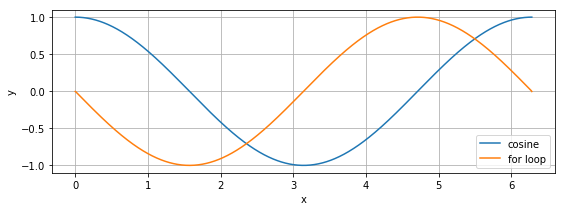

In [3]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.cos(x)

plt.figure(figsize=(9, 3))
plt.plot(x, y, label='cosine')
plt.plot(x, fderivation(y, x), label='for loop')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## La classe `Derivative`

Il s'agit ici de reprendre les développements précédent afin de créer une classe `Derivative` : 

* prenant en argument d'entrée deux objets de type `ndarray`, l'un étant l'axe des absisses `x` et l'autre le signal à dériver `y`,
* proposant une méthode `derivative` retournant la dérivé de `y` en fonction de `x`
* proposant une méthode `nderivative` prenant en argument d'entrée un entier $n$  et retournant la dérivée $n$-ième de `y` en fonction de `x`
* proposant une méthode `plot` prenant en argument d'entrée un entier $n$ et traçant sur une figure `y` en fonction de `x` et la dérivée $n$-ième de `y` en fonction de `x`

Vous pourrez créer un module `derivation` qui contiendra cette classe `Derivative`.